# Fingerprints: Feature distributions

In this notebook, we look at the distribution of features values observed in almost 5000 structures in order to get an impression on the feature value ranges and frequencies.

Recap - in the `kissim` fingerprint we have three feature groups:

- Physicochemical features (discrete/categorial values)
- Distances between residues and subpocket centers (continuous values)
- Moments (mean, standard deviation, skewness) of aforementioned distance distributions (continuous values)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from kissim.encoding import FingerprintGenerator, FingerprintNormalized

In [3]:
plt.style.use("seaborn")

In [4]:
HERE = Path(_dh[-1])
RESULTS = HERE / "../../results/"

Define feature names as to be displayed in plots.

In [5]:
SUBPOCKET_NAMES = {
    "hinge_region": "Hinge region",
    "dfg_region": "DFG region",
    "front_pocket": "Front pocket",
    "center": "Center",
}
PHYSICOCHEMICAL_NAMES = {
    "size": "Size",
    "hbd": "HBD",
    "hba": "HBA",
    "charge": "Charge",
    "aromatic": "Aromatic",
    "aliphatic": "Aliphatic",
    "sco": "Side chain orientation",
    "exposure": "Solvent exposure",
}
FEATURE_GROUP_TO_COLOR = {
    "physicochemical": "cornflowerblue",
    "distances": "gold",
    "moments": "orange",
}

## Load fingerprints

Let's load our pre-calculated fingerprint saved in a _json_ file as `FingerprintGenerator` object.

In [6]:
fingerprint_generator = FingerprintGenerator.from_json(
    RESULTS / "fingerprints.json", normalize=True
)
print(f"Number of fingerprints: {len(fingerprint_generator.data)}")

Number of fingerprints: 4918


## Feature distributions

Discrete datasets will be displayed as barplot, continuous datasets as histograms, boxplots, and violin plots.

### Physicochemical features (discrete values)

In [7]:
features_p = fingerprint_generator.physicochemical_exploded(normalized=False)
features_p_normalized = fingerprint_generator.physicochemical_exploded(normalized=True)
features_p

size  hbd  hba  charge  aromatic  aliphatic  \
structure_klifs_id residue_ix                                                
3835               1            2.0  0.0  2.0    -1.0       0.0        0.0   
                   2            1.0  0.0  0.0     0.0       0.0        1.0   
                   3            2.0  0.0  0.0     0.0       0.0        1.0   
                   4            1.0  0.0  0.0     0.0       0.0        1.0   
                   5            2.0  0.0  2.0    -1.0       0.0        0.0   
...                             ...  ...  ...     ...       ...        ...   
7219               81           2.0  0.0  2.0    -1.0       0.0        0.0   
                   82           3.0  0.0  0.0     0.0       1.0        0.0   
                   83           1.0  0.0  0.0     0.0       0.0        0.0   
                   84           2.0  0.0  0.0     0.0       0.0        1.0   
                   85           1.0  1.0  0.0     0.0       0.0        1.0   

                               sco  sco.vertex_angle  exposure  exposure.ratio  
structure_klifs_id residue_ix                                                   
3835               1           3.0         97.862045       3.0        0.708333  
                   2           3.0        112.561580       3.0        0.583333  
                   3           2.0         68.142827       1.0        0.307692  
                   4           2.0         47.580609       3.0        0.600000  
                   5           NaN               NaN       3.0        0.833333  
...                            ...               ...       ...             ...  
7219               81          3.0        130.239862       2.0        0.542857  
                   82          2.0         59.200867       2.0        0.500000  
                   83          NaN               NaN       3.0        0.565217  
                   84          3.0         97.825166       3.0        0.578947  
                   85          1.0         16.435765       1.0        0.440000  

[418030 rows x 10 columns]

__Note__: The categories for the features _side chain orientation (SCO)_ and _solvent exposure (exposure)_ are based on continuous values (`sco.vertex_angle` and `exposure.ratio`). Before we take a look at the discrete values, let's first check the distribution of these continuous values.

#### Continuous value distribution (SCO/exposure)

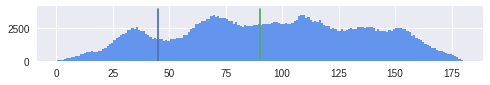

In [8]:
# Limits that were used to define categories
LIMIT1 = 45
LIMIT2 = 90
ax = features_p["sco.vertex_angle"].hist(
    figsize=(8, 1), bins=180, color=FEATURE_GROUP_TO_COLOR["physicochemical"]
)
ax.plot([LIMIT1, LIMIT1], [0, 4000])
ax.plot([LIMIT2, LIMIT2], [0, 4000]);

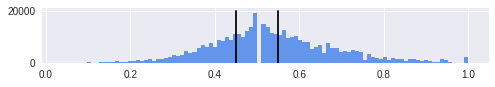

In [9]:
# Limits that were used to define categories
LIMIT1 = 0.45
LIMIT2 = 0.55
ax = features_p["exposure.ratio"].hist(
    figsize=(8, 1), bins=100, color=FEATURE_GROUP_TO_COLOR["physicochemical"]
)
ax.plot([LIMIT1, LIMIT1], [0, 20000], color="black")
ax.plot([LIMIT2, LIMIT2], [0, 20000], color="black");

#### Discrete value count

In [10]:
# Select only discrete values
features_p = (
    features_p.drop(["sco.vertex_angle", "exposure.ratio"], axis=1)
    .rename(columns=PHYSICOCHEMICAL_NAMES)
    .astype("Int32")
)
features_p_normalized = features_p_normalized.rename(
    columns=PHYSICOCHEMICAL_NAMES
)  # .astype("Int32")

Count number of bits per category and feature type.

In [11]:
counts = (
    pd.concat([feature.dropna().value_counts() for name, feature in features_p.items()], axis=1)
    .fillna(0)
    .astype("int32")
)
counts_normalized = (
    pd.concat(
        [feature.dropna().value_counts() for name, feature in features_p_normalized.items()],
        axis=1,
    )
    .fillna(0)
    .astype("int32")
)
counts

,Size,HBD,HBA,Charge,Aromatic,Aliphatic,Side chain orientation,Solvent exposure
-1,0,0,0,43534,0,0,0,0
0,0,267611,282987,308938,358195,219948,0,0
1,132219,123683,84977,59026,53303,191550,55966,113872
2,220816,0,43534,0,0,0,116969,122939
3,58463,20204,0,0,0,0,203814,174603


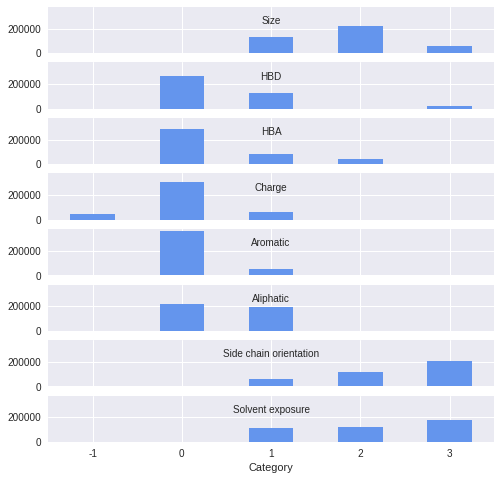

In [12]:
axes = counts.plot(
    kind="bar",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["physicochemical"],
    sharey=True,
    sharex=True,
    rot=0,
    title=None,
    figsize=(8, 8),
)
[ax.set_title("") for ax in axes]
[
    [i.set_visible(False) for i in ax.legend(loc=9, handlelength=0, handletextpad=0).legendHandles]
    for ax in axes
]
axes[-1].set_xlabel("Category");

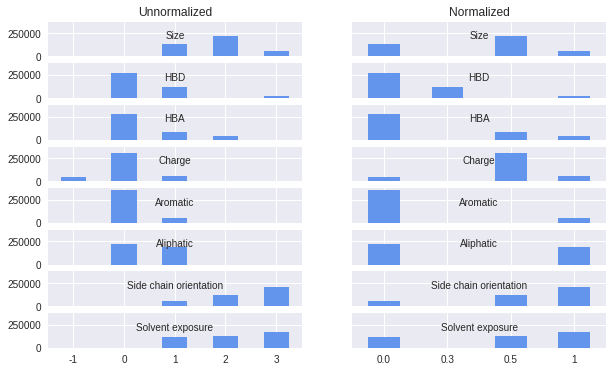

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(10, 6), sharey=True)
counts.plot(
    kind="bar",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["physicochemical"],
    rot=0,
    title=None,
    ax=[ax[0] for ax in axes],
)
counts_normalized.reset_index(drop=True).plot(
    kind="bar",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["physicochemical"],
    rot=0,
    title=None,
    ax=[ax[1] for ax in axes],
)
[ax[1].set_xticklabels([0.0, 0.3, 0.5, 1]) for ax in axes]
[ax.set_title("") for ax in axes.flatten()]
[
    [i.set_visible(False) for i in ax.legend(loc=9, handlelength=0, handletextpad=0).legendHandles]
    for ax in axes.flatten()
]
axes[0][0].set_title("Unnormalized")
axes[0][1].set_title("Normalized");

### Distance features (continuous values)

In [14]:
features_d = fingerprint_generator.distances_exploded(normalized=False)
features_d_normalized = fingerprint_generator.distances_exploded(normalized=True)
features_d

hinge_region  dfg_region  front_pocket  \
structure_klifs_id residue_ix                                           
3835               1              12.798095   19.079805     14.099948   
                   2              11.640075   16.481350     11.632327   
                   3               9.240445   15.125156      8.279718   
                   4              10.344351   13.665039      7.234169   
                   5              12.414604   12.788149      9.114764   
...                                     ...         ...           ...   
7219               81              8.892165    7.109349      6.723064   
                   82             11.366709    6.088001     10.422721   
                   83             13.247789    5.919116     11.564625   
                   84             16.129894    9.708284     13.088131   
                   85             16.746517   10.580341     14.536907   

                                  center  
structure_klifs_id residue_ix             
3835               1           17.262426  
                   2           15.175342  
                   3           12.447825  
                   4           11.853809  
                   5           12.903294  
...                                  ...  
7219               81           3.793342  
                   82           6.788561  
                   83           9.319808  
                   84          11.473628  
                   85          11.731262  

[418030 rows x 4 columns]

In [15]:
features_d = features_d.rename(columns=SUBPOCKET_NAMES)
features_d_normalized = features_d_normalized.rename(columns=SUBPOCKET_NAMES)
var_name_d = "Subpocket"
value_name_d = "Distance"

In [16]:
features_d_melted = features_d.melt(var_name=var_name_d, value_name=value_name_d)
features_d_normalized_melted = features_d_normalized.melt(
    var_name=var_name_d, value_name=value_name_d
)

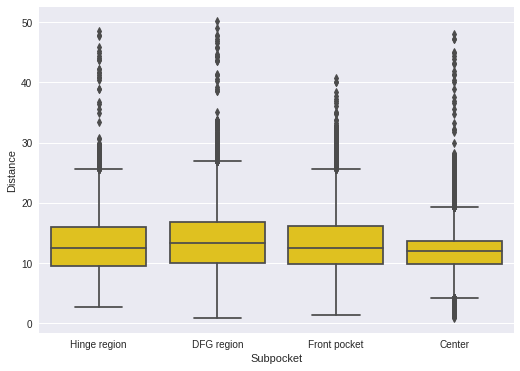

In [17]:
plt.figure(figsize=(8.5, 6))
axes = sns.boxplot(
    x=var_name_d, y=value_name_d, data=features_d_melted, color=FEATURE_GROUP_TO_COLOR["distances"]
)

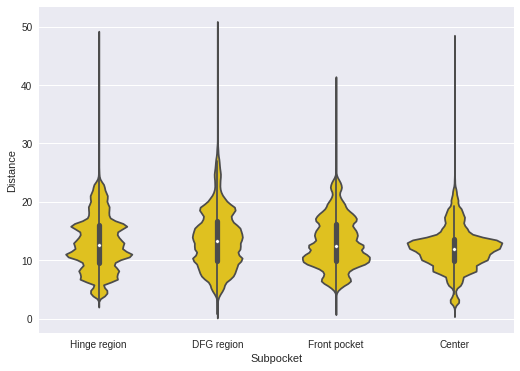

In [18]:
plt.figure(figsize=(8.5, 6))
sns.violinplot(
    x=var_name_d,
    y=value_name_d,
    data=features_d_melted,
    color=FEATURE_GROUP_TO_COLOR["distances"],
    rot=90,
);

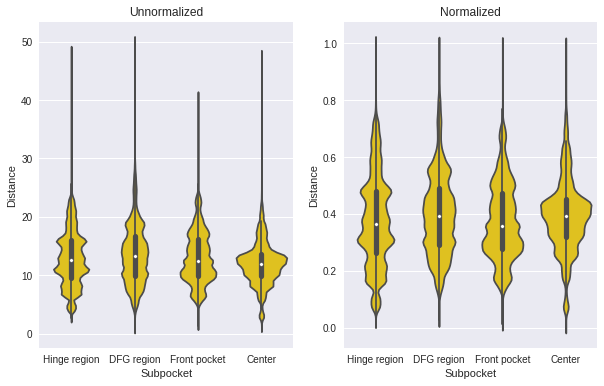

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))
for i, f in enumerate([features_d_melted, features_d_normalized_melted]):
    sns.violinplot(
        x=var_name_d,
        y=value_name_d,
        data=f,
        color=FEATURE_GROUP_TO_COLOR["distances"],
        rot=90,
        ax=axes[i],
    )
axes[0].set_title("Unnormalized")
axes[1].set_title("Normalized");

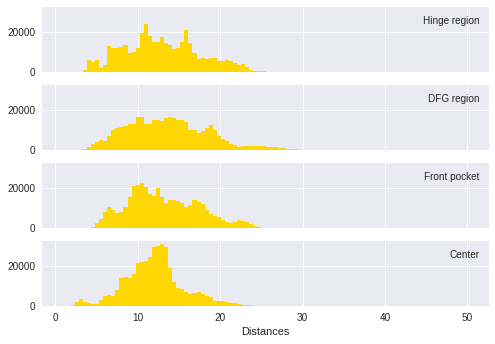

In [20]:
axes = features_d.plot(
    kind="hist",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["distances"],
    sharey=True,
    sharex=True,
    rot=0,
    bins=100,
)
[[i.set_visible(False) for i in ax.legend().legendHandles] for ax in axes]
[ax.set_ylabel("") for ax in axes]
axes[-1].set_xlabel("Distances");

### Moment features (continuous values)

In [21]:
features_m = fingerprint_generator.moments_exploded(normalized=False)
features_m_normalized = fingerprint_generator.moments_exploded(normalized=True)
features_m

hinge_region  dfg_region  front_pocket     center
structure_klifs_id moment                                                   
3835               1          12.979827   13.644731     13.124897  12.145142
                   2           4.897634    4.987416      4.573654   3.735073
                   3           3.913605    3.992377      4.083107   2.820512
6679               1          12.898065   13.495481     13.032143  12.050910
                   2           4.816083    4.981875      4.410318   3.675502
...                                 ...         ...           ...        ...
7218               2           4.727699    5.022503      4.003293   3.467233
                   3           3.162422    4.276922      2.743170   2.130481
7219               1          12.820987   14.029612     12.903874  11.972302
                   2           4.673883    5.101911      4.066200   3.388643
                   3           3.018078    4.402550      2.868695   1.488828

[14754 rows x 4 columns]

In [22]:
features_m = (
    features_m.rename(columns=SUBPOCKET_NAMES)
    .reset_index()
    .drop("structure_klifs_id", axis=1)
    .rename(columns={"moment": "Moment"})
)
features_m_normalized = (
    features_m_normalized.rename(columns=SUBPOCKET_NAMES)
    .reset_index()
    .drop("structure_klifs_id", axis=1)
    .rename(columns={"moment": "Moment"})
)
var_name_m = "Subpocket"
value_name_m = "Moment value"

In [23]:
features_m_melted = features_m.melt(
    id_vars=["Moment"], var_name=var_name_m, value_name=value_name_m
)
features_m_normalized_melted = features_m_normalized.melt(
    id_vars=["Moment"], var_name=var_name_m, value_name=value_name_m
)
features_m_melted

,Moment,Subpocket,Moment value
0,1,Hinge region,12.979827
1,2,Hinge region,4.897634
2,3,Hinge region,3.913605
3,1,Hinge region,12.898065
4,2,Hinge region,4.816083
...,...,...,...
59011,2,Center,3.467233
59012,3,Center,2.130481
59013,1,Center,11.972302
59014,2,Center,3.388643


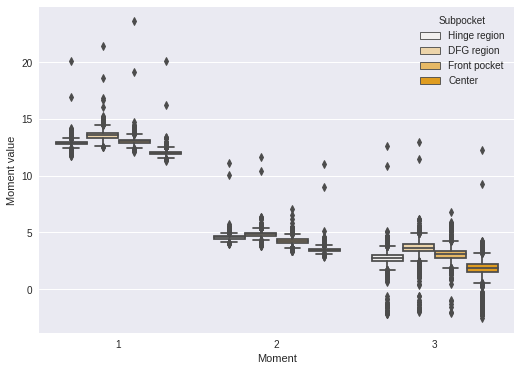

In [24]:
plt.figure(figsize=(8.5, 6))
axes = sns.boxplot(
    x="Moment",
    y=value_name_m,
    hue=var_name_m,
    data=features_m_melted,
    color=FEATURE_GROUP_TO_COLOR["moments"],
)

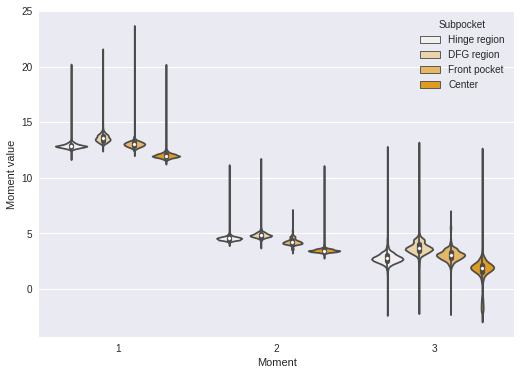

In [25]:
plt.figure(figsize=(8.5, 6))
axes = sns.violinplot(
    x="Moment",
    y=value_name_m,
    hue=var_name_m,
    data=features_m_melted,
    color=FEATURE_GROUP_TO_COLOR["moments"],
    rot=90,
)

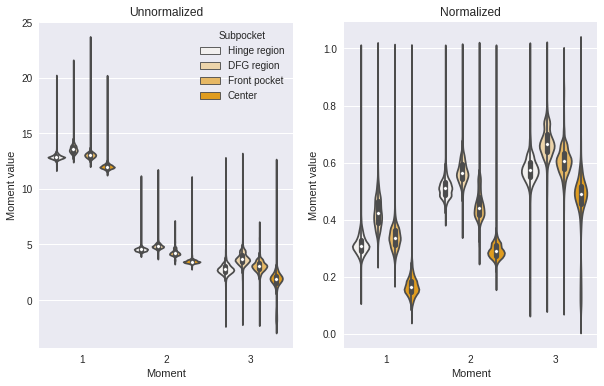

In [26]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))
for i, f in enumerate([features_m_melted, features_m_normalized_melted]):
    sns.violinplot(
        x="Moment",
        y=value_name_m,
        hue=var_name_m,
        data=f,
        color=FEATURE_GROUP_TO_COLOR["moments"],
        rot=90,
        ax=axes[i],
    )
axes[0].set_title("Unnormalized")
axes[1].set_title("Normalized")
axes[1].get_legend().remove()

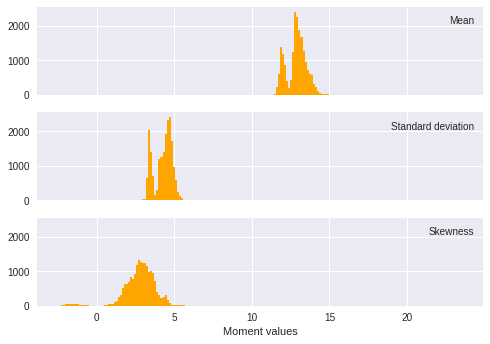

In [27]:
features_tmp = fingerprint_generator.moments_exploded()
features_tmp = features_tmp.stack().unstack(level=1).reset_index(drop=True)
features_tmp = features_tmp.rename(columns={1: "Mean", 2: "Standard deviation", 3: "Skewness"})

axes = features_tmp.plot(
    kind="hist",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["moments"],
    sharey=True,
    sharex=True,
    rot=0,
    bins=200,
)
[[i.set_visible(False) for i in ax.legend().legendHandles] for ax in axes]
[ax.set_ylabel("") for ax in axes]
axes[-1].set_xlabel("Moment values");

### Unnormalized vs. normalized features (summary)

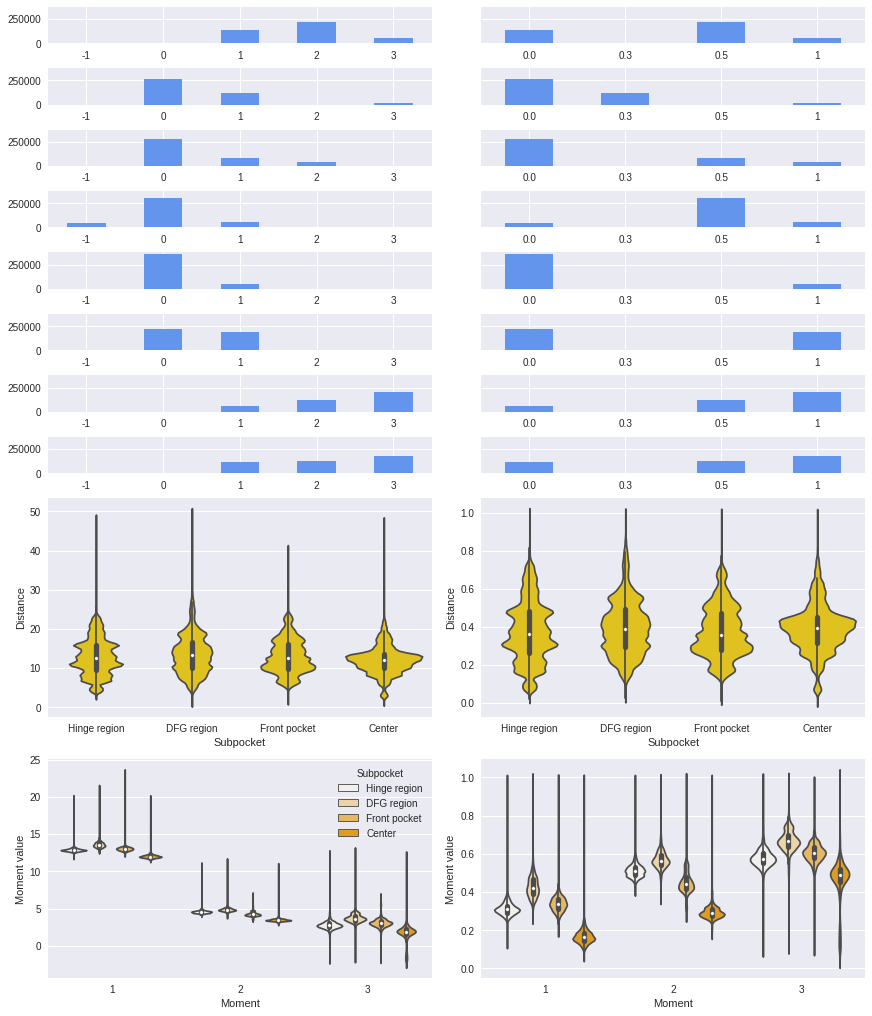

In [28]:
fig = plt.figure(constrained_layout=True, figsize=(12, 14))
ncols = 2
nrows = 10
widths = [1, 1]
heights = [1, 1, 1, 1, 1, 1, 1, 1, 6, 6]
spec = fig.add_gridspec(ncols=ncols, nrows=nrows, width_ratios=widths, height_ratios=heights)
axes = [[], []]

for col in range(ncols):
    for row in range(nrows):
        if 0 < row < 8:
            ax = fig.add_subplot(spec[row, col], sharey=axes[col][0])
        else:
            ax = fig.add_subplot(spec[row, col])
        axes[col].append(ax)

counts.plot(
    kind="bar",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["physicochemical"],
    rot=0,
    legend=None,
    ax=axes[0][:8],
)
counts_normalized.reset_index(drop=True).plot(
    kind="bar",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["physicochemical"],
    rot=0,
    legend=None,
    ax=axes[1][:8],
)
[ax.set_xticklabels([0.0, 0.3, 0.5, 1]) for ax in axes[1][:8]]
[ax.set_title("") for ax in axes[0][:8]]
[ax.set_title("") for ax in axes[1][:8]]
sns.violinplot(
    x=var_name_d,
    y=value_name_d,
    data=features_d_melted,
    color=FEATURE_GROUP_TO_COLOR["distances"],
    rot=90,
    ax=axes[0][8],
)
sns.violinplot(
    x=var_name_d,
    y=value_name_d,
    data=features_d_normalized_melted,
    color=FEATURE_GROUP_TO_COLOR["distances"],
    rot=90,
    ax=axes[1][8],
)
sns.violinplot(
    x="Moment",
    y=value_name_m,
    hue=var_name_m,
    data=features_m_melted,
    color=FEATURE_GROUP_TO_COLOR["moments"],
    rot=90,
    ax=axes[0][9],
)
sns.violinplot(
    x="Moment",
    y=value_name_m,
    hue=var_name_m,
    data=features_m_normalized_melted,
    color=FEATURE_GROUP_TO_COLOR["moments"],
    rot=90,
    ax=axes[1][9],
)
axes[1][9].get_legend().remove()

In [29]:
import matplotlib.pylab as pylab

params = {
    "legend.fontsize": "x-large",
    "legend.title_fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
}
pylab.rcParams.update(params)

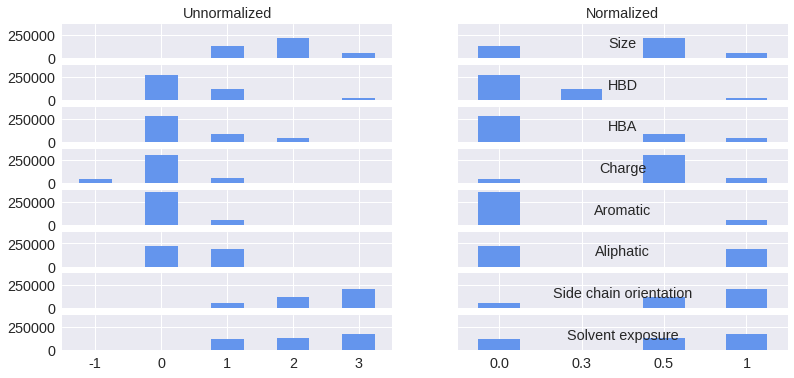

In [30]:
fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(13, 6), sharey=True)

counts.plot(
    kind="bar",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["physicochemical"],
    rot=0,
    ax=[ax[0] for ax in axes],
)
[ax[0].get_legend().remove() for ax in axes]


counts_normalized.reset_index(drop=True).plot(
    kind="bar",
    subplots=True,
    color=FEATURE_GROUP_TO_COLOR["physicochemical"],
    rot=0,
    ax=[ax[1] for ax in axes],
)
[ax[1].set_xticklabels([0.0, 0.3, 0.5, 1]) for ax in axes]
[
    [
        i.set_visible(False)
        for i in ax[1].legend(loc=9, handlelength=0, handletextpad=0).legendHandles
    ]
    for ax in axes
]

[ax.set_title("") for ax in axes.flatten()]
axes[0][0].set_title("Unnormalized", fontsize="x-large")
axes[0][1].set_title("Normalized", fontsize="x-large")

fig.savefig(
    HERE / "../figures/feature_distribution_physicochemical_unnormalized_vs_normalized.png",
    dpi=300,
    bbox_inches="tight",
)

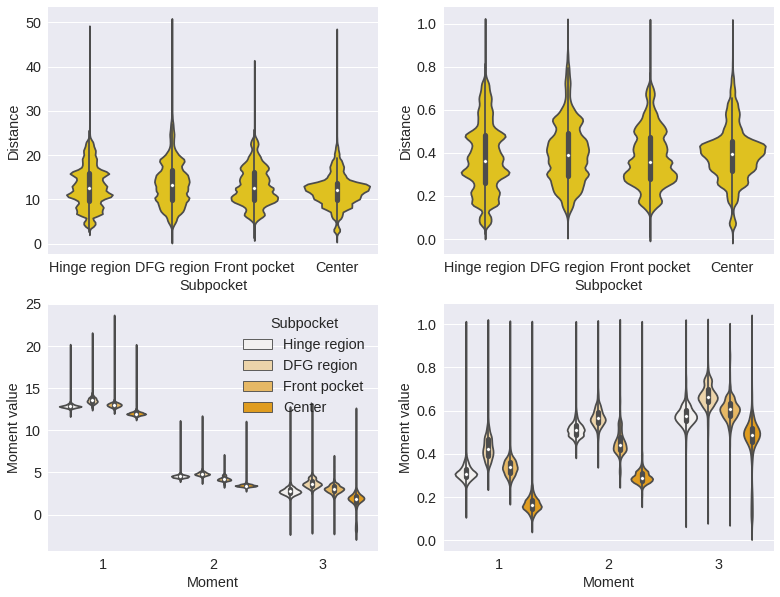

In [31]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(13, 10))
for i, f in enumerate([features_d_melted, features_d_normalized_melted]):
    sns.violinplot(
        x=var_name_d,
        y=value_name_d,
        data=f,
        color=FEATURE_GROUP_TO_COLOR["distances"],
        rot=90,
        ax=axes[0][i],
    )
for i, f in enumerate([features_m_melted, features_m_normalized_melted]):
    sns.violinplot(
        x="Moment",
        y=value_name_m,
        hue=var_name_m,
        data=f,
        color=FEATURE_GROUP_TO_COLOR["moments"],
        rot=90,
        ax=axes[1][i],
    )
axes[1][1].get_legend().remove()
# axes[1][0].get_legend().get_title().set_fontsize("x-large")
fig.savefig(
    HERE / "../figures/feature_distribution_spatial_unnormalized_vs_normalized.png",
    dpi=300,
    bbox_inches="tight",
)